## 交叉检验

In [5]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,log_loss,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine_data=datasets.load_wine()
data=wine_data.data
output=wine_data.target
kf=KFold(10,shuffle=True)
lr=LogisticRegression()
##     kf.split()
for train_index,test_index in kf.split(data,output):
    lr.fit(data[train_index],output[train_index])
    output_pre=lr.predict(data[test_index])
    print(f1_score(output[test_index],output_pre,average=None))

[1. 1. 1.]
[0.92307692 0.92307692 1.        ]
[0.83333333 0.85714286 1.        ]
[1. 1. 1.]
[1. 1. 1.]
[1.         0.94736842 0.85714286]
[1.         0.90909091 0.85714286]
[0.8        0.93333333 1.        ]
[1. 1. 1.]
[1.         0.85714286 0.75      ]


E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tens

average : string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘weighted’, ‘samples’]，This parameter is required for multiclass/multilabel targets.

①None：返回每一类各自的f1_score，得到一个array。

②'binary':  只对二分类问题有效，返回由pos_label指定的类的f1_score。

Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

③'micro': 设置average='micro'时，Precision = Recall = F1_score = Accuracy。

Note that for “micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F_beta.

Calculate metrics globally by counting the total true positives, false negatives and false positives.

④'macro': 对每一类别的f1_score进行简单算术平均（unweighted mean）, with assumption that all classes are equally important。

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

⑤'weighted': 对每一类别的f1_score进行加权平均，权重为各类别数在y_true中所占比例。

Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

⑥'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [40]:
#使用交叉检验
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,log_loss,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine_data=datasets.load_wine()
df_input =pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
df_output=pd.DataFrame(data=wine_data.target,columns=['output'])
df=df_input.join(df_output,how='outer')

kf=KFold(4,shuffle=True)
lr=LogisticRegression()

for train_index,test_index in kf.split(wine_data.data,wine_data.target):
    lr.fit(wine_data.data[train_index],wine_data.target[train_index])
    y_pre=lr.predict(wine_data.data[test_index])
    y_test=wine_data.target[test_index]
    print(f1_score(y_pre,y_test,average=None))

[1.         0.9375     0.92307692]
[0.89655172 0.85714286 0.96969697]
[0.96774194 0.97560976 1.        ]
[1. 1. 1.]


E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tens

## cross_val_score

Averaging
Macro-averaging

宏平均（Macro-averaging）是指所有类别的每一个统计指标值的算数平均值，也就是宏精确率（Macro-Precision），宏召回率（Macro-Recall），宏F值（Macro-F Score），其计算公式如下：

\begin{eqnarray} P_{macro} &=& \frac{1}{n}\sum_{i=1}^n P_i \end{eqnarray}

\begin{equation} R_{macro} = \frac{1}{n} \sum_{i=1}^n R_i \end{equation}

\begin{equation} F_{macro} = \frac{2 \times P_{macro} \times R_{macro}}{P_{macro} + R_{macro}} \end{equation}

Micro-averaging

微平均（Micro-averaging）是对数据集中的每一个示例不分类别进行统计建立全局混淆矩阵，然后计算相应的指标。其计算公式如下：

\begin{equation} P_{micro} = \frac{\bar{TP}}{\bar{TP} + \bar{FP}} = \frac{\sum_{i=1}^n {TP}_i}{\sum_{i=1}^n {TP}_i + \sum_{i=1}^n {FP}_i} \end{equation}

\begin{equation} R_{micro} = \frac{\bar{TP}}{\bar{TP} + \bar{FN}} = \frac{\sum_{i=1}^n {TP}_i}{\sum_{i=1}^n {TP}_i + \sum_{i=1}^n {FN}_i} \end{equation}

\begin{equation} F_{micro} = \frac{2 \times P_{micro} \times R_{micro}}{P_{micro} + R_{micro}} \end{equation}



Macro-averaging与Micro-averaging的不同之处在于：Macro-averaging赋予每个类相同的权重，然而Micro-averaging赋予每个样本决策相同的权重。因为从 F_1 值的计算公式可以看出，它忽略了那些被分类器正确判定为负类的那些样本，它的大小主要由被分类器正确判定为正类的那些样本决定的，在微平均评估指标中，样本数多的类别主导着样本数少的类。

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

rf_class=RandomForestClassifier(n_estimators=10)
lr_class=LogisticRegression()
svm_class=svm.LinearSVC()
print(cross_val_score(rf_class,data,output,scoring='accuracy',cv=10))
print(cross_val_score(lr_class,data,output,scoring='recall_macro',cv=4))

[0.94736842 0.88888889 0.94444444 0.94444444 1.         1.
 1.         0.94444444 1.         1.        ]
[0.92222222 0.93703704 1.         1.        ]


E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tens

In [6]:
#使用cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

rf_class=RandomForestClassifier(n_estimators=10)
log_class=LogisticRegression()
svm_class=svm.LinearSVC()

print(cross_val_score(rf_class,wine_data.data,wine_data.target,scoring='accuracy',cv=4))
print(cross_val_score(log_class,wine_data.data,wine_data.target,scoring='f1_micro',cv=4))

[0.8        0.93333333 1.         1.        ]
[0.91111111 0.93333333 1.         1.        ]


E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\envs\tens

## 模型逐渐复杂后的过拟合现象

          x         y       x_2       x_3       x_4       x_5           x_6  \
0  0.000000 -0.216289  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1  0.097738 -0.109635  0.009553  0.000934  0.000091  0.000009  8.717508e-07   
2  0.195477  0.603904  0.038211  0.007469  0.001460  0.000285  5.579205e-05   
3  0.293215  0.148634  0.085975  0.025209  0.007392  0.002167  6.355064e-04   
4  0.390954  0.633597  0.152845  0.059755  0.023362  0.009133  3.570691e-03   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  8.520356e-08  8.327663e-09  8.139328e-10  7.955252e-11  7.775339e-12   
2  1.090606e-05  2.131882e-06  4.167336e-07  8.146178e-08  1.592389e-08   
3  1.863402e-04  5.463780e-05  1.602064e-05  4.697497e-06  1.377378e-06   
4  1.395975e-03  5.457617e-04  2.133676e-04  8.341686e-05  3.261214e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+0

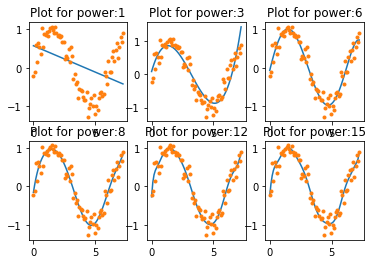

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

x=np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
y=np.sin(x)+np.random.normal(0,0.2,len(x))
data=pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

plt.plot(x,y,'.')

for i in range(2,16):
    column='x_%d'%i
    data[column]=data['x']**i
print(data.head(5))

from sklearn.linear_model import LinearRegression
def lin_gre(data,power,models_to_plot):
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    lg=LinearRegression()##normalize是对数据做标准化
    lg.fit(data[predictors],data['y'])
    y_pre=lg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout
        ##tight_layout会自动调整子图参数，使之填充整个图像区域。
        ##这是个实验特性，可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。
        plt.plot(data['x'],y_pre)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power:%d'%power)
    
    rss=sum((y_pre-data['y'])**2)
    ret=[rss]
    ret.append(lg.intercept_)
    ret.extend(lg.coef_)
    return ret

col=['rss','intercept']+['x_%d'%i for i in range(1,16)]
ind=['model_row_%d'%i for i in range(1,16)]
coef_matrix=pd.DataFrame(index=ind,columns=col)
print(coef_matrix)

models_to_plot={1:231,3:232,6:233,8:234,12:235,15:236}

for i in range(1,16):
    coef_matrix.iloc[i-1,0:i+2]=lin_gre(data=data,power=i,models_to_plot=models_to_plot)
print(coef_matrix)

## Ridge回归

         x_1        x_2         x_3          x_4           x_5           x_6  \
0   0.000000   0.000000    0.000000     0.000000      0.000000  0.000000e+00   
1   0.097738   0.009553    0.000934     0.000091      0.000009  8.717508e-07   
2   0.195477   0.038211    0.007469     0.001460      0.000285  5.579205e-05   
3   0.293215   0.085975    0.025209     0.007392      0.002167  6.355064e-04   
4   0.390954   0.152845    0.059755     0.023362      0.009133  3.570691e-03   
5   0.488692   0.238820    0.116709     0.057035      0.027873  1.362111e-02   
6   0.586431   0.343901    0.201674     0.118268      0.069356  4.067241e-02   
7   0.684169   0.468087    0.320251     0.219106      0.149905  1.025606e-01   
8   0.781908   0.611379    0.478042     0.373785      0.292265  2.285242e-01   
9   0.879646   0.773777    0.680650     0.598731      0.526671  4.632841e-01   
10  0.977384   0.955280    0.933676     0.912560      0.891922  8.717508e-01   
11  1.075123   1.155889    1.242723     

E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.634711e-17
  overwrite_a=True).T


             rss   intercept         x_1         x_2          x_3  \
x_row_0  2.09993  0.00256121   -0.274809     6.56182     -12.4595   
x_row_1   2.1478  -0.0480061     1.19775    -0.39156     0.293743   
x_row_2  2.16011  -0.0262897    0.908903    0.327926    -0.375145   
x_row_3  2.39349 -0.00122802     1.28199   -0.408891   -0.0122728   
x_row_4   3.7709    0.318943     0.69508   -0.218608   -0.0129514   
x_row_5  7.89086    0.745425   0.0750927  -0.0773153  -0.00667711   
x_row_6  23.0322    0.443247  -0.0834104 -0.00854536 -0.000737589   
x_row_7  32.7942    0.190338  -0.0270805 -0.00276105  -0.00025347   
x_row_8  35.7963    0.133221  -0.0147207 -0.00149856 -0.000138309   
x_row_9  37.6683    0.101059 -0.00768093 -0.00078025 -7.20095e-05   

                 x_4          x_5          x_6          x_7          x_8  \
x_row_0      11.3694     -5.62056      1.41821    -0.105005   -0.0269661   
x_row_1    -0.230725    0.0502785   0.00124669 -0.000967028 -6.67939e-05   
x_row_2    0

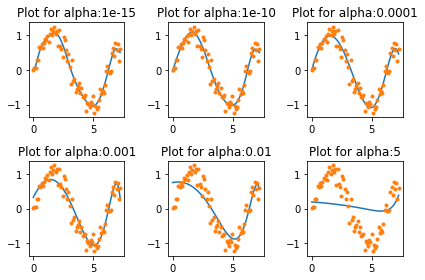

In [82]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1.4*i*np.pi/180 for i in range(0,300,4)])##注意是180而不是18
y=np.sin(x)+np.random.normal(0,0.2,len(x))
data =pd.DataFrame()
predictors=[]
for i in range(1,16):
    data['x_{}'.format(i)]=x**i
    predictors.append('x_%d'%i)
data['y']=y
print(data)


def rid_reg(data,alpha,alpha_dict={}):
    ridge=Ridge(alpha=alpha,normalize=True)
    ridge.fit(data[predictors],data['y'])
    ##拟合模型时最好用dataframe
    rid_pre=ridge.predict(data[predictors])
    
    if alpha in alpha_dict:
        plt.subplot(alpha_dict[alpha])
        plt.plot(x,rid_pre)
        plt.plot(x,y,'.')
        plt.tight_layout()
        plt.title('Plot for alpha:{}'.format(alpha))
    
    res=sum((y-rid_pre)**2)
    ret=[res]
    ret.extend([ridge.intercept_])
    ret.extend(ridge.coef_)
    return ret

col=['rss','intercept']+['x_%d'%i for i in range(1,16)]##总数为2+斜率数
ind=['x_row_%d'%i for i in range(0,10)]
ridge_matrix=pd.DataFrame(index=ind,columns=col)
alpha_dict={1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
alpha=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for i in range(0,10):
    ridge_matrix.iloc[i,]=rid_reg(data=data,alpha=alpha[i],alpha_dict=alpha_dict)
print(ridge_matrix)

## Lasso回归

In [14]:
type(data[predictors])

pandas.core.frame.DataFrame

         x_1        x_2         x_3          x_4           x_5           x_6  \
0   0.000000   0.000000    0.000000     0.000000      0.000000  0.000000e+00   
1   0.097738   0.009553    0.000934     0.000091      0.000009  8.717508e-07   
2   0.195477   0.038211    0.007469     0.001460      0.000285  5.579205e-05   
3   0.293215   0.085975    0.025209     0.007392      0.002167  6.355064e-04   
4   0.390954   0.152845    0.059755     0.023362      0.009133  3.570691e-03   
5   0.488692   0.238820    0.116709     0.057035      0.027873  1.362111e-02   
6   0.586431   0.343901    0.201674     0.118268      0.069356  4.067241e-02   
7   0.684169   0.468087    0.320251     0.219106      0.149905  1.025606e-01   
8   0.781908   0.611379    0.478042     0.373785      0.292265  2.285242e-01   
9   0.879646   0.773777    0.680650     0.598731      0.526671  4.632841e-01   
10  0.977384   0.955280    0.933676     0.912560      0.891922  8.717508e-01   
11  1.075123   1.155889    1.242723     

E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: 

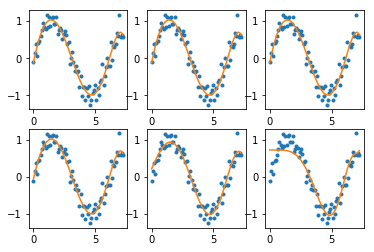

In [20]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
y=np.sin(x)+np.random.normal(0,0.2,len(x))
plt.plot(x,y,'.')

data=pd.DataFrame()
predictors=[]
for i in range(1,16):
    data['x_%d'%i]=x**i
    predictors.append('x_%d'%i)
data['y']=y
print(data)

def las_reg(data,predictors,alpha,alpha_dict):
    lasreg=Lasso(alpha =alpha, max_iter=1e5)
    lasreg.fit(data[predictors],data['y'])
    y_pre=lasreg.predict(data[predictors])
    
    if alpha in alpha_dict:
        plt.subplot(alpha_dict[alpha])
        plt.plot(x,y,'.')
        plt.plot(x,y_pre)
    
    res=sum((y-y_pre)**2)
    ret=[res]
    ret.append(lasreg.intercept_)
    ret.extend(lasreg.coef_)
    return ret

col=['res']+['intercept']+['x_%d'%i for i in range(1,16)]
ind=['x_row_%d'%i for i in range(1,11)]
las_matrix=pd.DataFrame(index=ind,columns=col)
alpha_dict={1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
alpha_list=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
for i in range(0,10):
    las_matrix.iloc[i,]=las_reg(data=data,predictors=predictors,alpha=alpha_list[i],alpha_dict=alpha_dict)##alpha列表需要注意遍历